# Computational Methods in Stochastics - Assignment 1

## Exercise 1

In [27]:
import random
import numpy as np
from scipy.stats import moment
import matplotlib .pyplot as plt

In [28]:
X_A = 0.5
X_B = X_A + 1e-3
N = 10000000

def calculate_moments(rand):
    mean = rand.mean()
    var = rand.var()
    moment_2 = var + mean ** 2
    return mean, var, moment_2

def plot_re(ax, x, y, title):
    ax.figure(figsize=[10, 5])
    ax.scatter(x, y, s=70)
    ax.title(title, fontsize=25)
    ax.xlabel('X', fontsize=15)
    ax.ylabel('Y', fontsize=15)
    ax.grid()
    
def plot_scatter(ax, x, y, title):
    ax.scatter(x, y, s=70)
    ax.set_title(title, fontsize=25)
    ax.set_xlabel('X', fontsize=15)
    ax.set_ylabel('Y', fontsize=15)
    ax.grid()
    
def plot_compare_RNG(x1, y1, x2, y2, x3, y3, X_A, X_B):
    fig, axs = plt.subplots(2, 3, figsize=(25, 15))
    
    plot_scatter(axs[0, 0], x1, y1, 'GGL')
    plot_scatter(axs[0, 1], x2, y2, 'RAN3')
    plot_scatter(axs[0, 2], x3, y3, 'Mersenne-Twister')

    idx1 = np.argwhere((X_A <= x1) & (x1 <= X_B))
    idx2 = np.argwhere((X_A <= x2) & (x2 <= X_B))
    idx3 = np.argwhere((X_A <= x3) & (x3 <= X_B))

    x1_int, y1_int = x1[idx1], y1[idx1]
    x2_int, y2_int = x2[idx2], y2[idx2]
    x3_int, y3_int = x3[idx3], y3[idx3]

    plot_scatter(axs[1, 0], x1_int, y1_int, 'GGL')
    axs[1, 0].set_xlim(left=X_A, right=X_B)

    plot_scatter(axs[1, 1], x2_int, y2_int, 'RAN3')
    axs[1, 1].set_xlim(left=X_A, right=X_B)

    plot_scatter(axs[1, 2], x3_int, y3_int, 'Mersenne-Twister')
    axs[1, 2].set_xlim(left=X_A, right=X_B)

    plt.show()



Random Numbers: [7.82636926e-06 1.31537788e-01 7.55605322e-01 ... 8.94186569e-01
 5.93670704e-01 8.23525705e-01]
Mean: 0.5000186495299089
Variance: 0.08331991532406101
Second Moment: 0.3333385652017749


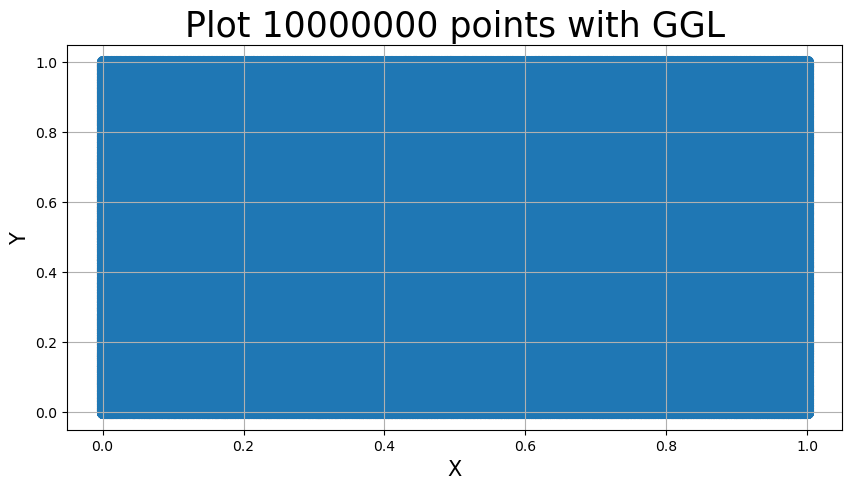

In [29]:
# Impelementation of GGL 
N = 10000000

def GGL(a, m, x_i):
    return (a * x_i) % m 

def generate_random_numbers(N, seed=1):
    x_i = seed
    A = 16807
    M = pow(2, 31) - 1

    rand = []
    for _ in range(N):
        x_i = GGL(A, M, x_i)
        norm_x_i = x_i / M
        rand.append(norm_x_i)

    rand = np.array(rand)
    mean, var, moment_2 = calculate_moments(rand)
    return rand, mean, var, moment_2

seed = 1
rand, mean, var, moment_2 = generate_random_numbers(N, seed)

print("Random Numbers:", rand)
print("Mean:", mean)
print("Variance:", var)
print("Second Moment:", moment_2)

x1 = rand[::2]
y1 = rand[1::2]

plot_re(plt, x1, y1, f"Plot {N} points with GGL")
plt.show()

Random Numbers: [0.36320898 0.71886174 0.52072081 ... 0.80877529 0.22287116 0.27082482]
Mean: 0.499908230264785
Variance: 0.08334129200438642
Second Moment: 0.3332495306908557


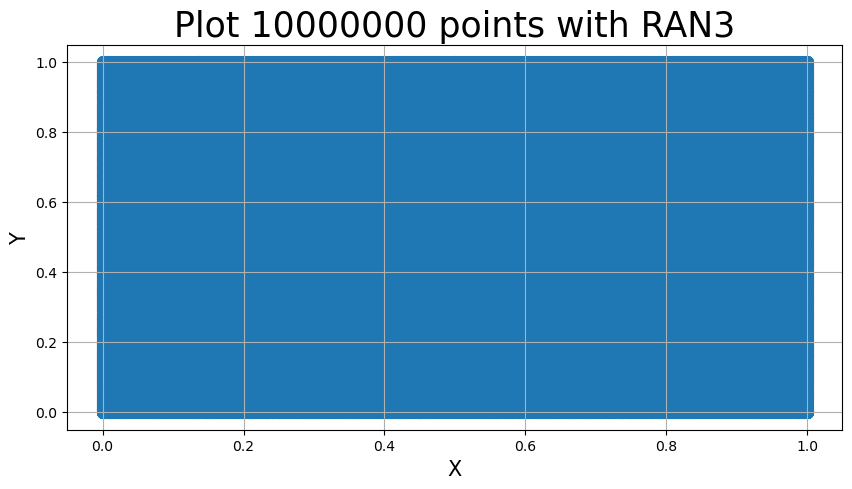

In [30]:
# Implementation of RAN3
def RAN3(x, m):
    return(x[-55] - x[-24]) % m
    

def initialize_GGL_sequence(seed, A, M, initial_runs):
    x_i = seed
    rand = []
    for _ in range(initial_runs):
        x_i = GGL(A, M, x_i)
        rand.append(x_i)
    
    return rand

def generate_random_numbers_RAN(N, seed=1):
    A_GGL = 16807
    M_GGL = 2**31 - 1
    M_RAN3 = 10**9
    initial_runs = 55
    rand = initialize_GGL_sequence(seed, A_GGL, M_GGL, initial_runs)
    for i in range(N):
        x_i = RAN3(rand, M_RAN3)
        rand.append(x_i)
    
    rand = np.array(rand[initial_runs:]) / M_RAN3
    return rand

rand = generate_random_numbers_RAN(N, seed)
mean, var, moment_2 = calculate_moments(rand)


print("Random Numbers:", rand)
print("Mean:", mean)
print("Variance:", var)
print("Second Moment:", moment_2)

x2 = rand[::2]
y2 = rand[1::2]

plot_re(plt, x2, y2, f"Plot {N} points with RAN3")
plt.show()

Random Numbers: [0.63185088 0.611525   0.22997145 ... 0.82221543 0.47572857 0.93179761]
Mean: 0.49981734176248277
Variance: 0.08332641881610667
Second Moment: 0.33314379394262117


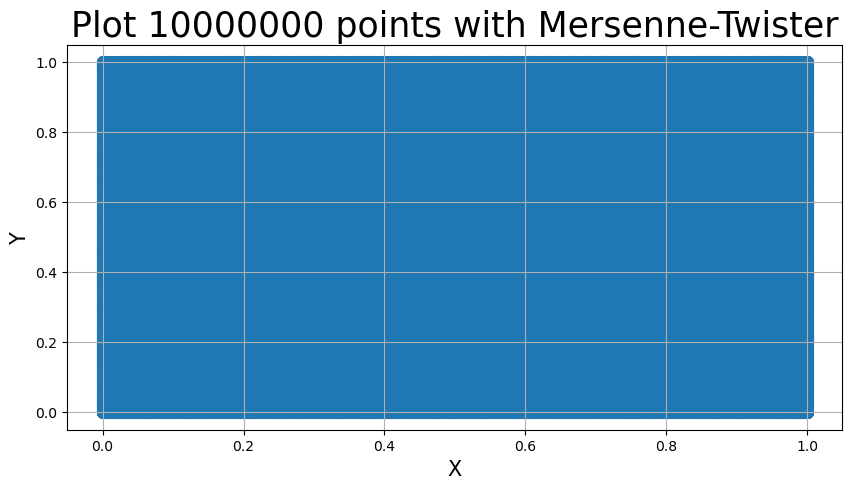

In [31]:
# Implement built-in random generator
def generate_random_numbers_python(N):
    rand = [random.random() for _ in range(N)]
    rand = np.array(rand)
    return rand

rand = generate_random_numbers_python(N)
mean, var, moment_2 = calculate_moments(rand)

print("Random Numbers:", rand)
print("Mean:", mean)
print("Variance:", var)
print("Second Moment:", moment_2)

x3 = rand[::2]
y3 = rand[1::2]

plot_re(plt, x3, y3, f"Plot {N} points with Mersenne-Twister")
plt.show()

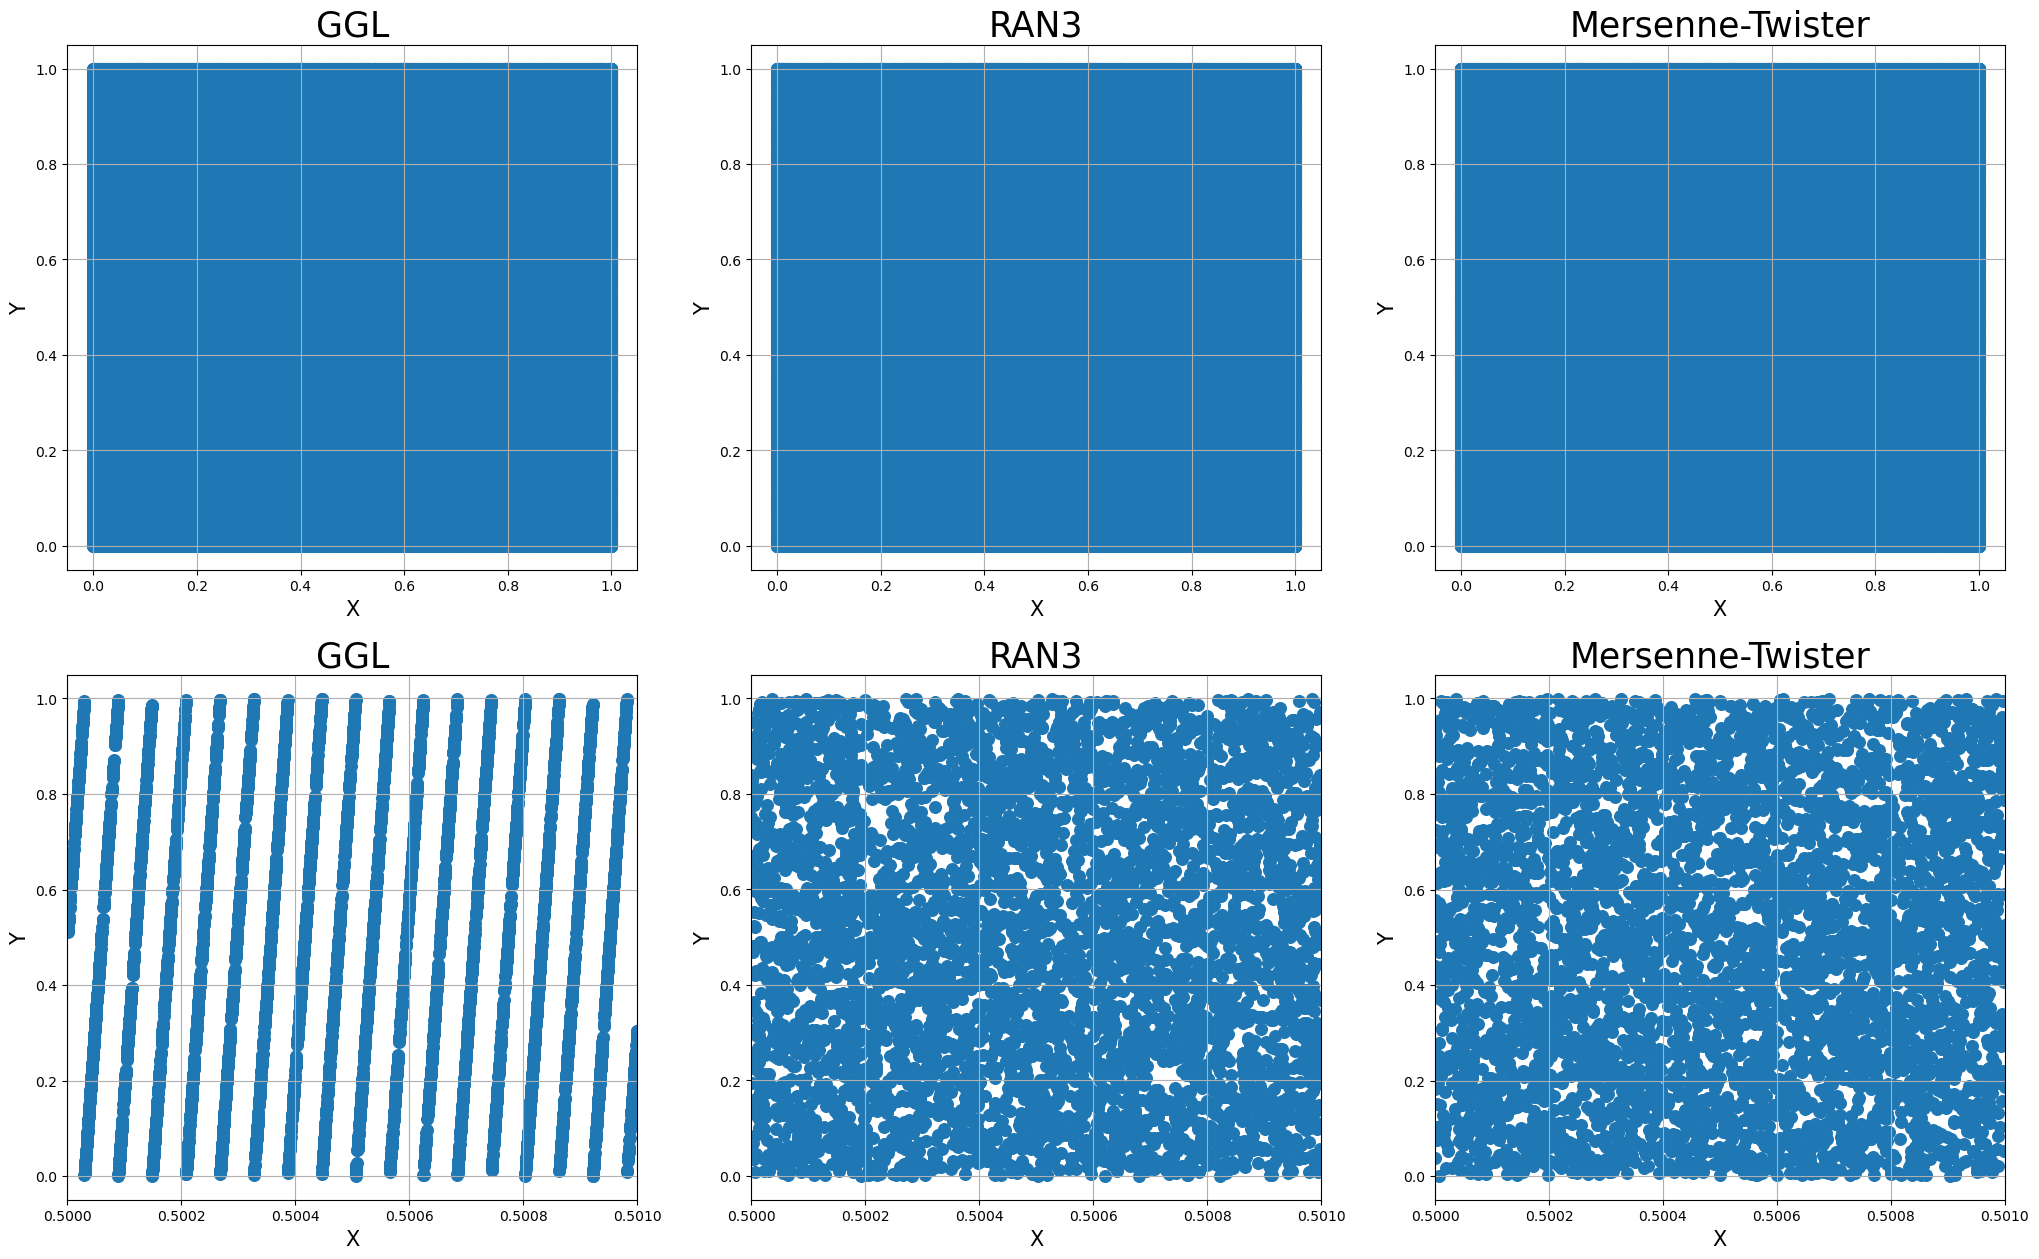

In [32]:
# Plot comparison fig
X_A = 0.5
X_B = X_A + 1e-3
plot_compare_RNG(x1, y1, x2, y2, x3, y3, X_A, X_B)

From the plots, it's evident that the randomly generated points closely adhere to a uniform distribution within the range of $X \sim U(0,1)$ and $Y \sim U(0,1)$. With a larger sample size, specifically when $N = 20,000$ (where N represents the number of generated points), the points comprehensively cover the entire unit square defined by $(0,1) \times (0,1)$.

Furthermore, it's worth noting that all three random number generators perform well in meeting the moment test criteria. For k = 1, they exhibit a mean value of approximately 0.5, indicating that the generated points are centered around the midpoint of the interval. Additionally, for k = 2, the second moment is approximately 0.33, confirming the spread and dispersion of the points within the unit square.

The second row of plots zooms in on a narrow interval, specifically the range [0.5000, 0.5001]. At smaller sample sizes, it can be challenging to discern significant differences between the generators. However, by restarting the notebook with a larger N value exceeding 20,000, subtle distinctions between the generators become more apparent and observable.

## Exercise 2

In [58]:
# Utils cell
def generate_agents(nr_agents, nr_interactions, manipulation_func):
    agents = np.full((nr_agents,), 50)
    
    for i in range(nr_agents):
        for _ in range(nr_interactions):
            u = np.random.random()
            agents[i] = manipulation_func(u, agents[i])
    
    return agents

def plot_histograms(agents, bins, log=False):
    fig, axs = plt.subplots(1, len(bins), figsize=(15, 2))
    
    for i, num_bins in enumerate(bins):
        axs[i].hist(agents, edgecolor='b', bins=num_bins, linewidth=1, density=True)
        axs[i].set_xlabel('Optimism/Pessimism', fontsize=10)
        axs[i].set_title(f'Hist with {num_bins} bins')
        axs[i].grid()
        
        if log:
            axs[i].set_yscale('log')
    
    plt.show()

### a)

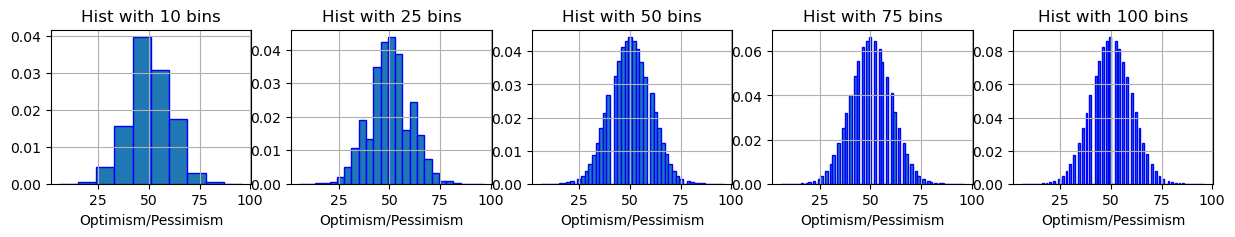

In [63]:
NR_AGENTS = 500000
NR_INTERACTIONS = 100

def manipulation_func_a(u, agent_value):
    value = -1 if u >= 0.5 else 1
    return agent_value + value

agents_a = generate_agents(NR_AGENTS, NR_INTERACTIONS, manipulation_func_a)
plot_histograms(agents_a, bins=[10, 25, 50, 75, 100])

From the plots above, it's evident that the distribution exhibits characteristics reminiscent of a Gaussian distribution, especially as the number of bins increases. This phenomenon exemplifies one of the most renowned concepts in statistics: the Central Limit Theorem.

We can conceptualize the optimism/pessimism of each individual as a random variable, denoted as $S_i$. This variable represents the sum of a constant value ($50$) and $100$ independent uniform discrete random variables ($U_i \sim U\{-1, 1\}$). Mathematically, this can be expressed as:

$$
S_i = 50 + U_1 + U_2 + \ldots + U_{100}
$$

In this scenario, each $S_i$ follows a normal distribution with an expected value of $\mathbb{E}[S_i] = 50$ and a variance of $Var[S_i] = 100$.

### b)

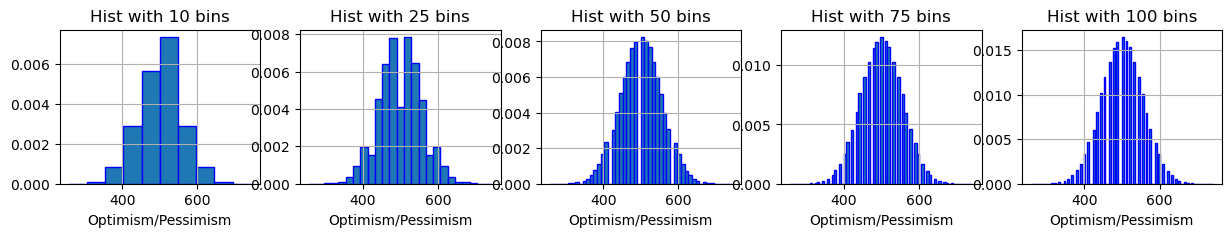

In [64]:
NR_AGENTS = 500000
NR_INTERACTIONS = 100

def manipulation_func_b(u, agent_value):
    value = -0.5 if u >= 0.5 else 10
    return agent_value + value

agents_b = generate_agents(NR_AGENTS, NR_INTERACTIONS, manipulation_func_b)
plot_histograms(agents_b, bins=[10, 25, 50, 75, 100])

Similar to point **2.a** we obtain a Gaussian distribution, the only differences are the mean and the variance. These differences are given because the distribution of the random variable is changed from a $U\{-1,1\}$ to $U\{-0.5,10\}$.

### c)

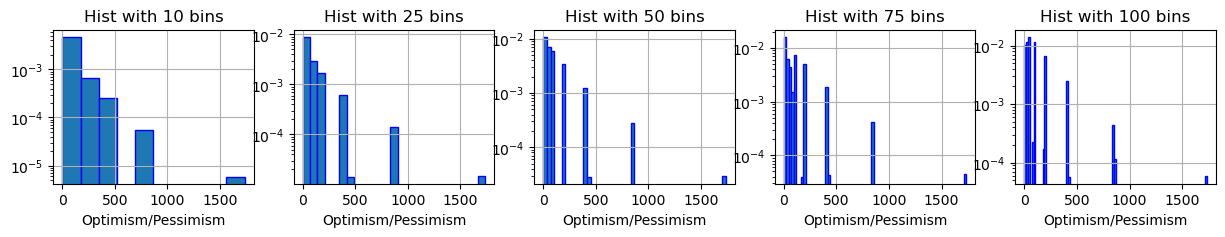

In [65]:
NR_AGENTS = 500000
NR_INTERACTIONS = 10

def manipulation_func_c(u, agent_value):
    mult = 1/0.7 if u >= 0.5 else 0.7
    return agent_value * mult

agents_c = generate_agents(NR_AGENTS, NR_INTERACTIONS, manipulation_func_c)
plot_histograms(agents_c, bins=[10, 25, 50, 75, 100], log=True)

Although this last exercise showcases the Central Limit Theorem, the outcome resembles a Lognormal distribution because it's influenced by a multiplicative process.

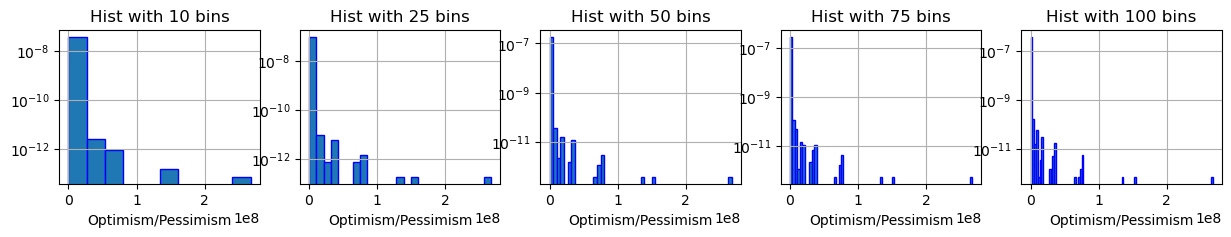

In [66]:
NR_AGENTS = 500000
NR_INTERACTIONS = 100

agents_d = generate_agents(NR_AGENTS, NR_INTERACTIONS, manipulation_func_c)
plot_histograms(agents_d, bins=[10, 25, 50, 75, 100], log=True)

In this second part, I attempted to plot the outcome of the multiplicative process after $100$ interactions. The challenge with this representation is that the optimism/pessimism scale ranges from $0$ to $3 \times 10^8$.